#Subject classificattion

In [ ]:
import pandas as pd

In [ ]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

In [ ]:
print(train_data.shape)
print(test_data.shape)

(8695, 3)
(1586, 3)


In [ ]:
8695+1586

10281

In [ ]:
train_data.head(5)

,Id,Comment,Topic
0,0x840,A few things. You might have negative- frequen...,Biology
1,0xbf0,Is it so hard to believe that there exist part...,Physics
2,0x1dfc,There are bees,Biology
3,0xc7e,I'm a medication technician. And that's alot o...,Biology
4,0xbba,Cesium is such a pretty metal.,Chemistry


__Preprocessing__

In [ ]:
# connecting training and testing data

df = pd.concat([train_data, test_data], axis=0)
df.shape

(10281, 3)

In [ ]:
df.Topic.value_counts()

Topic
Biology      4205
Chemistry    3426
Physics      2650
Name: count, dtype: int64

In [ ]:
#Balancing the imbalance data

min_samples = 2650

bio_data = df.loc[df['Topic'] == 'Biology'].sample(min_samples, random_state=42)
chem_data = df.loc[df['Topic'] == 'Chemistry'].sample(min_samples, random_state=42)
phy_data = df.loc[df['Topic'] == 'Physics'].sample(min_samples, random_state=42)

bal_data = pd.concat([bio_data, chem_data, phy_data], axis=0)
bal_data.Topic.value_counts()

Topic
Biology      2650
Chemistry    2650
Physics      2650
Name: count, dtype: int64

In [ ]:
# encoding topic into numbers

bal_data = bal_data.drop("Id", axis=1)
bal_data['Topic_n'] = bal_data.Topic.map(
    {"Biology": 0, "Chemistry": 1, "Physics": 2}
)
print(bal_data.Topic.value_counts())
print()
print(bal_data.Topic_n.value_counts())

Topic
Biology      2650
Chemistry    2650
Physics      2650
Name: count, dtype: int64

Topic_n
0    2650
1    2650
2    2650
Name: count, dtype: int64


__ML model__

In [ ]:
# train and test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    bal_data.Comment,
    bal_data.Topic_n,
    stratify=bal_data.Topic_n, # balances the the praportion after splitting
    random_state=42,
    test_size=0.2
)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report

In [ ]:
# BOW

clf = Pipeline([
    ('vector', CountVectorizer()),
    ('model', MultinomialNB())
])

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.73      0.75       530
           1       0.70      0.71      0.70       530
           2       0.74      0.76      0.75       530

    accuracy                           0.73      1590
   macro avg       0.73      0.73      0.73      1590
weighted avg       0.73      0.73      0.73      1590



In [ ]:
# n grams 1, 2

clf = Pipeline([
    ('vector', CountVectorizer(ngram_range=(1, 2))),
    ('model', MultinomialNB())
])

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.69      0.73       530
           1       0.71      0.66      0.68       530
           2       0.68      0.80      0.74       530

    accuracy                           0.72      1590
   macro avg       0.72      0.72      0.72      1590
weighted avg       0.72      0.72      0.72      1590



In [ ]:
x_test

3228    Second half of this comment: https://www.reddi...
632                     By having a more educated public.
8583    You growing body parts in the back of your toi...
7489            A fathom is 6 feet, now I'm confused   ;)
6503    Viruses are quite complex because they are eve...
                              ...                        
8303          And that’s why you don’t use a screwdriver…
2654    It's probably just ehat was in the lab already...
0       A few things. You might have negative- frequen...
1046                                     Nope. Needs a H.
5528                                 yo take a chill pill
Name: Comment, Length: 1590, dtype: object

In [ ]:
y_test

3228    2
632     2
8583    0
7489    2
6503    0
       ..
8303    1
2654    2
0       0
1046    1
5528    0
Name: Topic_n, Length: 1590, dtype: int64

In [ ]:
y_pred

array([2, 2, 0, ..., 0, 0, 0])

In [ ]:
# Now preprocess the content in dataframe

import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
def preprocess(content):
  filter = []
  doc = nlp(content)

  for token in doc:
    if token.is_stop or token.is_space or token.is_punct:
      continue
    filter.append((token.lemma_).lower())
  return " ".join(filter)

'particularly important classification task want maintain class distribution training testing set'

In [ ]:
bal_data

,Comment,Topic,Topic_n
1664,Ah ok- I just got on my laptop - but I was on ...,Biology,0
4480,What are bird predictors?,Biology,0
373,Maple syrup is more of the finished product. B...,Biology,0
375,"No, you need to learn how to google better. Sy...",Biology,0
1444,"They can indeed. If they want to go to church,...",Biology,0
...,...,...,...
6561,Are you soft in the head sir?\n\nYou can measu...,Physics,2
4472,Me too,Physics,2
4629,"Okay, first of all the bigger problem is that ...",Physics,2
5219,"Ok cool, an actual answer. Thank you",Physics,2


In [ ]:
bal_data['processed_data'] = bal_data.Comment.apply(preprocess)

In [ ]:
bal_data

,Comment,Topic,Topic_n,processed_data
1664,Ah ok- I just got on my laptop - but I was on ...,Biology,0,ah ok- get laptop phone early today closely sc...
4480,What are bird predictors?,Biology,0,bird predictor
373,Maple syrup is more of the finished product. B...,Biology,0,maple syrup finished product yes sap main cons...
375,"No, you need to learn how to google better. Sy...",Biology,0,need learn google well symbiosis organism diff...
1444,"They can indeed. If they want to go to church,...",Biology,0,want church guess atheist pack maybe attend ch...
...,...,...,...,...
6561,Are you soft in the head sir?\n\nYou can measu...,Physics,2,soft head sir?\n\nyou measure distance speed r...
4472,Me too,Physics,2,
4629,"Okay, first of all the bigger problem is that ...",Physics,2,okay big problem direction wrong travel time w...
5219,"Ok cool, an actual answer. Thank you",Physics,2,ok cool actual answer thank


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    bal_data.processed_data,
    bal_data.Topic_n,
    stratify=bal_data.Topic_n, # balances the the praportion after splitting
    random_state=42,
    test_size=0.2
)

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report

# BOW

clf = Pipeline([
    ('vector', CountVectorizer()),
    ('model', MultinomialNB())
])

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.74      0.73       530
           1       0.71      0.70      0.70       530
           2       0.75      0.75      0.75       530

    accuracy                           0.73      1590
   macro avg       0.73      0.73      0.73      1590
weighted avg       0.73      0.73      0.73      1590



__Confusion matrix__

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

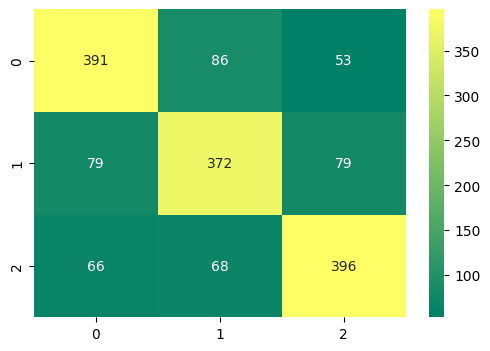

In [ ]:
plt.figure(figsize=(6, 4),)
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    cmap="summer",
    annot=True,
    fmt = 'd',
    linecolor='black'
)
plt.show()

# news classification

In [ ]:
import pandas as pd

In [ ]:
fake = pd.read_csv("/content/drive/MyDrive/DataSets/fake_news/Fake.csv")
true = pd.read_csv('/content/drive/MyDrive/DataSets/fake_news/True.csv')

In [ ]:
print(fake.shape)
print(true.shape)

(23481, 4)
(21417, 4)


In [ ]:
fake.tail(5)

,title,text,subject,date
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


In [ ]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [ ]:
true.tail(5)

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [ ]:
true.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [ ]:
print(true.subject.value_counts())
print()
print(fake.subject.value_counts())

subject
politicsNews    11272
worldnews       10145
Name: count, dtype: int64

subject
News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64


In [ ]:
# encoding

true['en_sub'] = true.subject.map({"politicsNews":0, "worldnews":1})
true.head()

,title,text,subject,date,en_sub
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [ ]:
true.isnull().sum()

title      0
text       0
subject    0
date       0
en_sub     0
dtype: int64

__Modelling without Pre-processing Text data__

In [ ]:
# Modelling without Pre-processing Text data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    true.text, true.en_sub, random_state=2022, stratify= true.en_sub, train_size=0.8
)

print(x_train.shape)
print(y_test.value_counts())
print(y_train.value_counts())

(17133,)
en_sub
0    2255
1    2029
Name: count, dtype: int64
en_sub
0    9017
1    8116
Name: count, dtype: int64


In [ ]:
# unigram

from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

kn = Pipeline([
    ('vector', CountVectorizer()),
    ('knn_mod', KNeighborsClassifier(n_neighbors=10, metric='euclidean')),
])

kn.fit(x_train, y_train)
y_pred = kn.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      2255
           1       0.88      0.87      0.88      2029

    accuracy                           0.88      4284
   macro avg       0.88      0.88      0.88      4284
weighted avg       0.88      0.88      0.88      4284



In [ ]:
# bigram with cosine

kn = Pipeline([
    ('vector', CountVectorizer(ngram_range=(1, 2))),
    ('knn_mod', KNeighborsClassifier(n_neighbors=10, metric='cosine')),
])

kn.fit(x_train, y_train)
y_pred = kn.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91      2255
           1       0.92      0.88      0.90      2029

    accuracy                           0.91      4284
   macro avg       0.91      0.91      0.91      4284
weighted avg       0.91      0.91      0.91      4284



In [ ]:
# trigram with randoom forest

from sklearn.ensemble import RandomForestClassifier

kn = Pipeline([
    ('vector', CountVectorizer()),
    ('rf_mod', RandomForestClassifier(n_estimators=100)),
])

kn.fit(x_train, y_train)
y_pred = kn.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.93      2255
           1       0.92      0.93      0.92      2029

    accuracy                           0.93      4284
   macro avg       0.93      0.93      0.93      4284
weighted avg       0.93      0.93      0.93      4284



In [ ]:
# unigram and bi using multinomial

from sklearn.naive_bayes import MultinomialNB

kn = Pipeline([
    ('vector', CountVectorizer(ngram_range=(1, 2))),
    ('naive_mod', MultinomialNB(alpha=0.75)),
])

kn.fit(x_train, y_train)
y_pred = kn.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      2255
           1       0.91      0.95      0.93      2029

    accuracy                           0.93      4284
   macro avg       0.93      0.93      0.93      4284
weighted avg       0.93      0.93      0.93      4284



Modelling with Pre-processing Text data

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

def preprocess(text):
  doc = nlp(text)
  filter = []
  for token in doc:
    if token.is_space or token.is_punct or token.is_stop:
      continue
    filter.append((token.lemma_).lower())
  return " ".join(filter)

In [ ]:
true['pre_text'] = true.text.apply(preprocess)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    true.pre_text, true.en_sub, random_state=2022, stratify= true.en_sub, train_size=0.8
)

In [ ]:
# trigram with random forest

from sklearn.ensemble import RandomForestClassifier

kn = Pipeline([
    ('vector', CountVectorizer(ngram_range=(3, 3))),
    ('rf_mod', RandomForestClassifier(n_estimators=50)),
])

kn.fit(x_train, y_train)
y_pred = kn.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      2255
           1       0.91      0.88      0.89      2029

    accuracy                           0.90      4284
   macro avg       0.90      0.90      0.90      4284
weighted avg       0.90      0.90      0.90      4284

